In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv('refined_dM.csv')
df.head()

,session_id,left_acc,right_acc,left_insula,right_insula,left_caudate,right_caudate,left_putamen,right_putamen,Hb,T1a
0,sub-HC015_ses-MR_FOLLOWUP_,"[0.022319, 0.01701, 0.018306, 0.007623, 0.0062...","[0.040722, 0.032066, 0.022006, 0.012467, 0.014...","[0.034636, 0.028494, 0.014213, 0.008407, 0.015...","[0.023565, 0.017147, 0.012018, 0.009255, 0.009...","[0.014326, 0.009502, 0.010639, 0.005681, 0.002...","[0.016321, 0.008794, 0.007625, 0.006366, 0.004...","[0.023862, 0.017842, 0.013274, 0.009691, 0.009...","[0.014442, 0.015458, 0.008435, 0.005949, 0.004...",14.8,4.933333
1,sub-HC025_ses-MR_BASELINE_,"[0.021568, 0.016979, 0.015378, 0.01326, 0.0101...","[0.035484, 0.025937, 0.023478, 0.023913, 0.018...","[0.028959, 0.020692, 0.022477, 0.021618, 0.009...","[0.019431, 0.014077, 0.014241, 0.011508, 0.004...","[0.008959, 0.005743, 0.005918, 0.006371, 0.003...","[0.011229, 0.010887, 0.011508, 0.004684, 0.007...","[0.022469, 0.015999, 0.016702, 0.011814, 0.004...","[0.010461, 0.01127, 0.008855, 0.002358, 0.0054...",15.9,5.300000
2,sub-HC025_ses-MR_FOLLOWUP_,"[0.017579, 0.017481, 0.009133, 0.009088, 0.009...","[0.030378, 0.027036, 0.0154, 0.012787, 0.01460...","[0.027585, 0.026954, 0.01603, 0.0112, 0.01308,...","[0.018162, 0.016875, 0.011387, 0.007147, 0.008...","[0.008641, 0.008869, 0.003547, 0.004306, 0.003...","[0.012154, 0.007938, 0.004111, 0.005826, 0.001...","[0.019674, 0.018701, 0.01153, 0.008438, 0.0090...","[0.014541, 0.009621, 0.006074, 0.007602, 0.003...",15.9,5.300000
3,sub-HC005_ses-MR_BASELINE_,"[0.018733, 0.01589, 0.016105, 0.010888, 0.0061...","[0.031663, 0.02857, 0.015934, 0.012519, 0.0190...","[0.036091, 0.025892, 0.025746, 0.015231, 0.018...","[0.019381, 0.01547, 0.013939, 0.008559, 0.0099...","[0.011655, 0.00766, 0.008451, 0.002607, 0.0041...","[0.015198, 0.017022, 0.006108, 0.009595, 0.012...","[0.023518, 0.016264, 0.016129, 0.009709, 0.011...","[0.014624, 0.012972, 0.005553, 0.006608, 0.006...",12.2,4.066667
4,sub-HC005_ses-MR_FOLLOWUP_,"[0.014037, 0.013615, 0.010713, 0.010969, 0.006...","[0.026697, 0.016468, 0.022111, 0.015841, 0.018...","[0.023055, 0.017518, 0.022484, 0.019574, 0.015...","[0.017159, 0.012052, 0.009199, 0.009033, 0.007...","[0.008996, 0.006992, 0.004457, 0.006584, 0.003...","[0.009622, 0.014576, 0.013216, 0.011953, nan, ...","[0.012178, 0.010195, 0.010964, 0.007989, 0.007...","[0.008361, 0.009407, 0.00565, 0.004521, nan, n...",12.2,4.066667


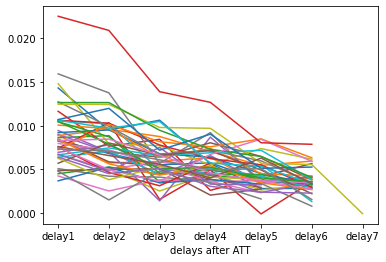

In [11]:
delays = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
fig, ax = plt.subplots()

for index, row in df.iterrows():
    data = row.left_caudate[1:-1].split(',') # convert string to list
    data = [float(i) for i in data if i != ' None']   
    ax.plot(delays, data, label=row.session_id)
    
plt.xlabel('delays after ATT')
plt.show()

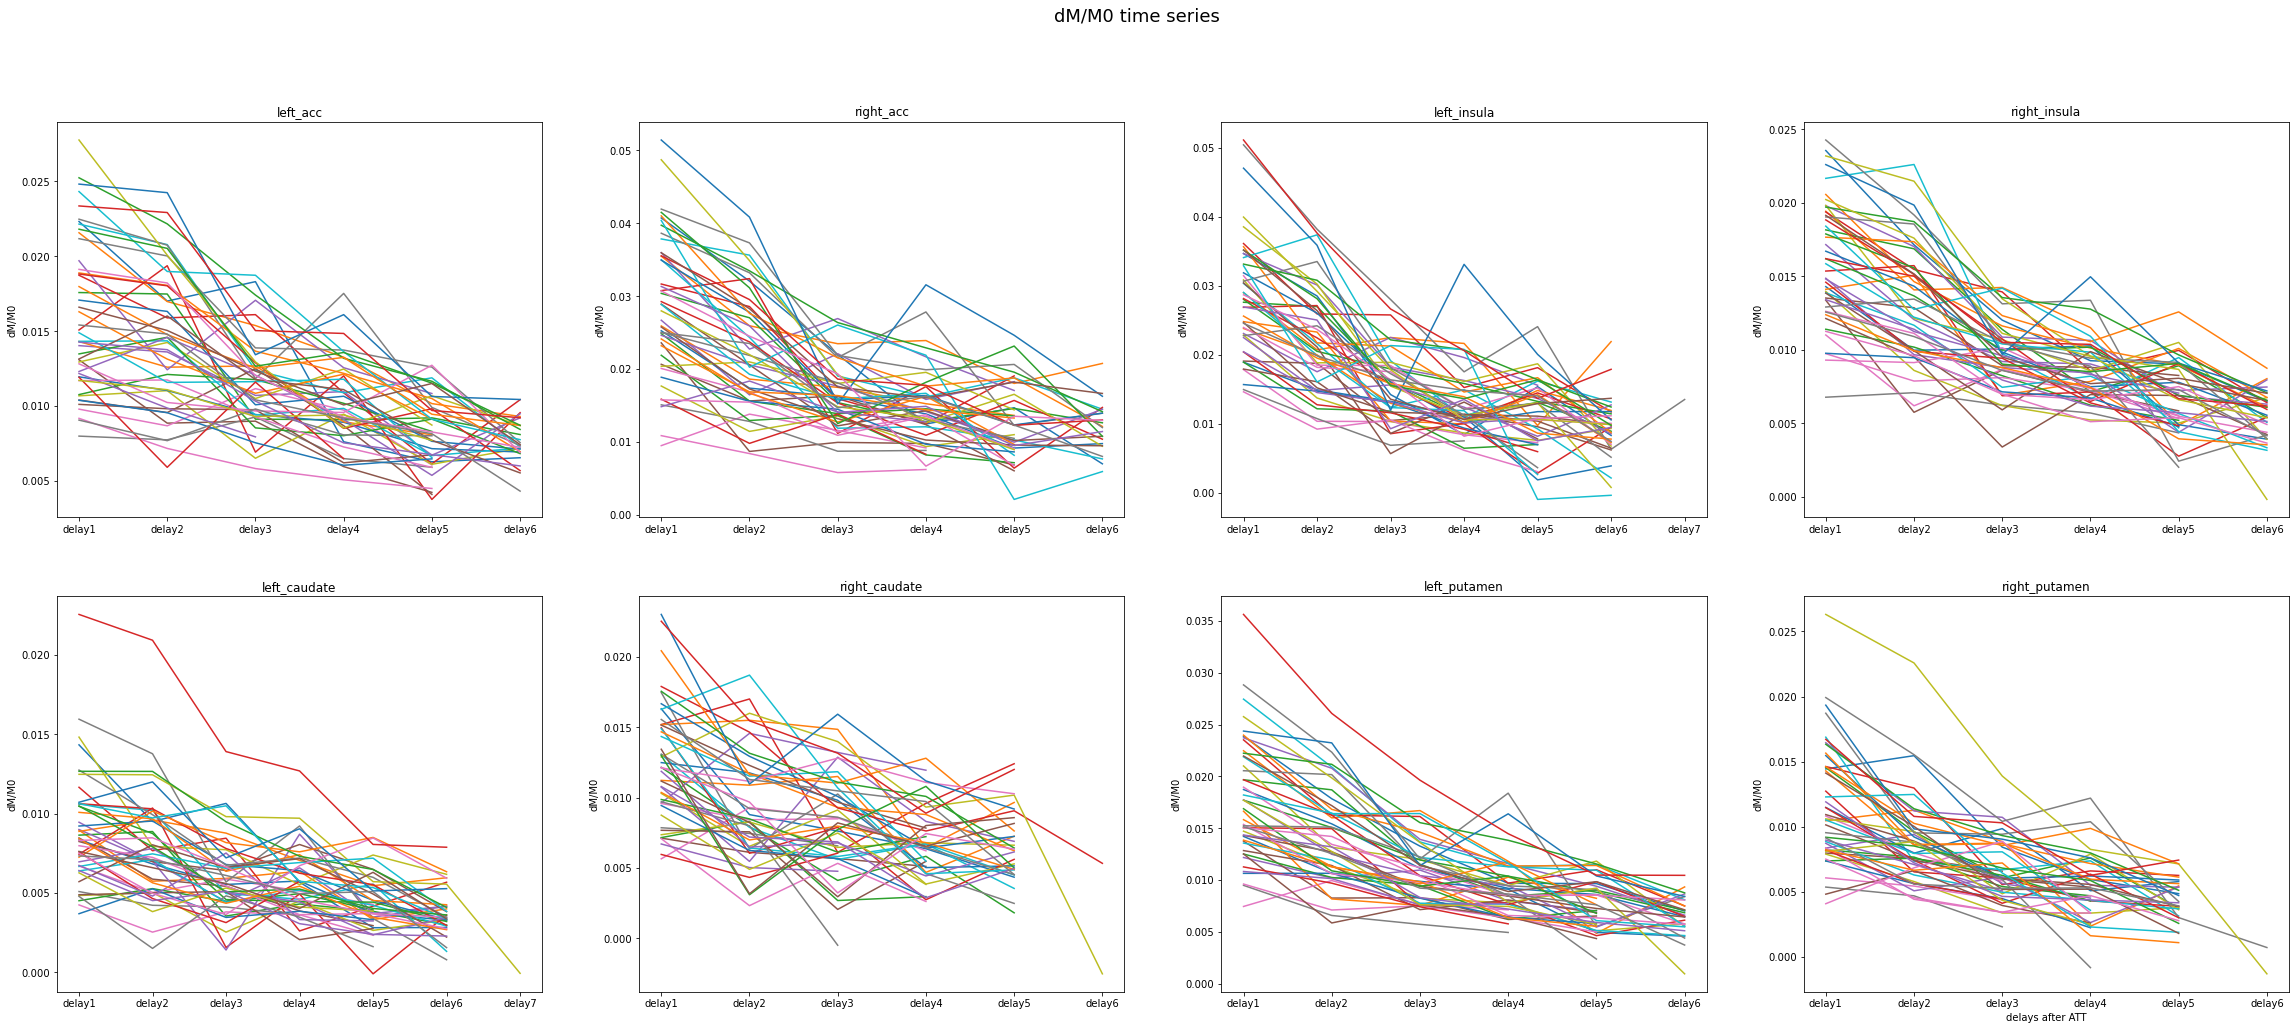

In [12]:
timepoints = ["delay1", "delay2", "delay3", "delay4", "delay5", "delay6", "delay7"]
fig, axes = plt.subplots(2,4, figsize=(40,16))

rois = ['left_acc', 'right_acc', 'left_insula', 'right_insula', 'left_caudate', 'right_caudate', 'left_putamen', 'right_putamen']

for i, ax in enumerate(fig.axes):
    if i < len(rois):
        roi = rois[i]
            
        for index, row in df.iterrows():
            data = row[roi][1:-1].split(',') # convert string to list
            data = [float(i) for i in data]   
            ax.plot(delays, data)
            ax.set_ylabel('dM/M0')
#             ax.set_ylim(ylim)
            ax.set_title(roi)

plt.xlabel('delays after ATT')
fig.suptitle('dM/M0 time series', fontsize=18)
fname="../figs/dMM0_timeseries.png"
plt.savefig(fname, facecolor='white', edgecolor='none')
plt.show()